In [6]:
%pip install fastbook transformers tokenizers==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 7.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.9/140.9 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 17.3 MB/s eta 0:00:00
Reason for being yanked: Breaking change with unexpected effect
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.1
    Uninstalling wasabi-1.1.1:
      Successfully uninstalled wasabi-1.1.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokenizers-0.13.3
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.2
    Uninstalling urllib3-2.0.2:
      Successfully uninstalled urllib3-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.3.0
    Uninstalling smart-open-6.3.0:
      Successfully uninstalled smart-open-6.3.0
ERROR: pip's dependency resolver does 

CHAP 3

In [2]:
%pip install --upgrade --force-reinstall protobuf==3.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import fastbook
import torch
from fastai.vision.all import *
from fastbook import *
import numpy as np
import numpy.random as nprnd

fastbook.setup_book()



/usr/local/lib/python3.9/dist-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (3.0.4)/charset_normalizer (2.1.0) doesn't match a supported version!
  warnings.warn(


10.75
10.75


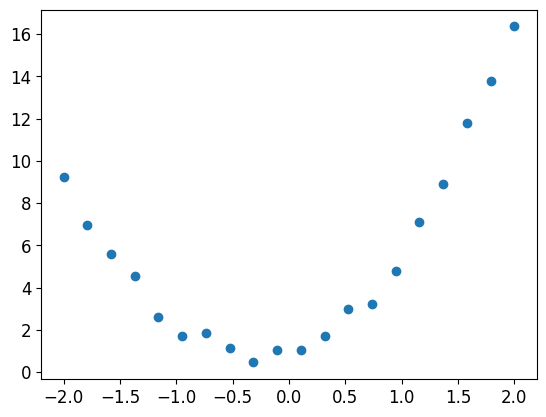

In [4]:
def quad(a,b,c,x): return a*x**2 + b*x + c
r = quad(3,2,1,1.5)
print(r)

def make_quad(a,b,c): return lambda x: a*x**2 + b*x + c
q = make_quad(3,2,1)
print(q(1.5))
np.random.seed(42)
def noise(x,scale):  return nprnd.normal(scale=scale,size=x.shape) 
def add_noise(x,mult,add): return x + mult*noise(x,add)

x = torch.linspace(-2,2,steps=20)[:,None]
y = add_noise(q(x),0.3,1.5)
plt.scatter(x,y)


In [16]:
from ipywidgets import interact
""" @interact(a=1.5,b=1.5,c=1.5) """
def plot_quad(a,b,c):
    f = make_quad(a,b,c)
    loss= mse(f(x),y)
    plot_function(f,title=f'Loss: {loss}')
    plt.scatter(x,y)

def mse(preds,acts): return ((preds-acts)**2).mean().sqrt()
def quad_mse(params):
    f= make_quad(*params)
    return mse(f(x),y)

def rectified_linear(m,b,x):
    y = m*x+b
    return torch.clip(y,0,)
def double_relu(m1,b1,m2,b2,x):
    return rectified_linear(m1,b1,x) + rectified_linear(m2,b2,x)
abc = torch.tensor((1.5,1.5,1.5),requires_grad=True)
loss = quad_mse(abc)
print(f'Loss: {loss}')
loss.backward()

abc.grad
with torch.no_grad():
    abc -= abc.grad * 0.01
    loss = quad_mse(abc)

print(f'Loss: {loss}')

for i in range(20):
    loss = quad_mse(abc)
    loss.backward()
    with torch.no_grad():
        abc -= abc.grad * 0.01
        abc.grad.zero_()
    """ print(f'Loss: {loss}') """

    

interactive(children=(FloatSlider(value=1.5, description='a', max=4.5, min=-1.5), FloatSlider(value=1.5, descr…

Loss: 2.585228709805038
Loss: 2.544165625566391


In [24]:
@interact(m1=1.5,b1=1.5,m2=1.5,b2=1.5)
def plot_rdouble_relu(m1,b1,m2,b2):
    plot_function(partial(double_relu,m1,b1,m2,b2))
    plt.scatter(x,y)
# 3x3 matrix
matrix1 = torch.tensor([[1, 2, 1],
                        [0, 1, 0],
                        [2, 3, 4]])

# 3x2 matrix
matrix2 = torch.tensor([[2, 5],
                        [6, 7],
                        [1, 8]])
result = torch.matmul(matrix1, matrix2)
result

interactive(children=(FloatSlider(value=1.5, description='m1', max=4.5, min=-1.5), FloatSlider(value=1.5, desc…

tensor([[15, 27],
        [ 6,  7],
        [26, 63]])

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from torch.nn import Linear
import torch.optim as optim
import torch
import torch.nn as nn

class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
df = pd.read_csv('./train.csv')
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Fare','SibSp','Parch']
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df_encoded = pd.get_dummies(df,columns=['Sex','Embarked','Pclass'])
df_encoded.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
# Convert boolean columns to integers
bool_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['Survived'], test_size=0.2)

# Convert DataFrames to PyTorch Tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

model = SimpleNeuralNetwork(input_size=df_encoded.shape[1], hidden_size=16, output_size=1)
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(200):
    y_pred = model(X_train_tensor)

    loss = torch.mean((y_pred.squeeze() - y_train_tensor) ** 2)

    loss.backward()

    optimizer.step()

y_pred = model(X_test_tensor)
accuracy = ((y_pred > 0.5).squeeze().float() == y_test_tensor).float().mean()
# Run the model on the entire test dataset
y_pred_test = model(X_test_tensor)

# Convert the predictions to binary labels using a threshold of 0.5
y_pred_binary = (y_pred_test > 0.5).squeeze().float()

# Convert the PyTorch tensor containing the predictions to a NumPy array
y_pred_numpy = y_pred_binary.detach().numpy()

# Create a new DataFrame with the desired columns
predictions_df = pd.DataFrame(data={'Index': X_test.index, 'Prediction': y_pred_numpy})
# Compare the predicted labels with the true labels and count the matches
correct_predictions = (y_pred_binary == y_test_tensor).float().sum().item()

print(f"Number of correctly predicted samples: {correct_predictions}\{y_test_tensor.shape[0]}")

KeyError: 'Age'

CHAP 4

In [22]:
import pandas as pd
from datasets import Dataset
from transformers import AutoModelForSequenceClassification,AutoTokenizer
df = pd.read_csv('./train.csv')
df.describe(include=["object"])
df['input'] = 'TEXT1:'+ df.context + '; TEXT2:'+df.target + '; ANC1: '+ df.anchor
df.input.head()
dataset = Dataset.from_pandas(df)
model_nm = 'microsoft/deberta-v3-small'
tokenizer = AutoTokenizer.from_pretrained(model_nm)
tokenizer.tokenize("I love you. I hate you. I don't know.")
def tok_func(x): return tokenizer(x['input'])

tok_ds = dataset.map(tok_func,batched=True)
row = tok_ds[0]
tok_ds = tok_ds.rename_columns({'score':'labels'})



Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/578 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.9/dist-packages/transformers/convert_slow_tokenizer.py:434: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Parameter 'function'=<function tok_func at 0x7f42e87c5e50> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the d

  0%|          | 0/37 [00:00<?, ?ba/s]

In [30]:
eval_df = pd.read_csv('./test.csv')
eval_df.describe()

,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


In [14]:
from sklearn import datasets

housing : pd.DataFrame  = datasets.fetch_california_housing(as_frame=True) # type: ignore

housing = housing["data"].join(housing["target"]).sample(1000,random_state=52)

housing.head() 


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
7506,3.0550,37.0,5.152778,1.048611,729.0,5.062500,33.92,-118.28,1.054
4720,3.0862,35.0,4.697897,1.055449,1159.0,2.216061,34.05,-118.37,3.453
12888,2.5556,24.0,4.864905,1.129222,1631.0,2.395007,38.66,-121.35,1.057
13344,3.0057,32.0,4.212687,0.936567,1378.0,5.141791,34.05,-117.64,0.969
7173,1.9083,42.0,3.888554,1.039157,1535.0,4.623494,34.05,-118.19,1.192


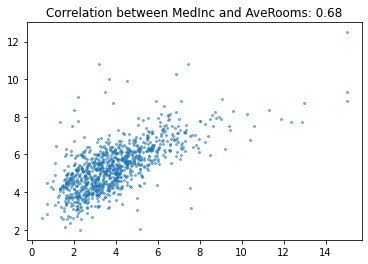

In [20]:
np.set_printoptions(precision=2,suppress=True)

def corr(x,y): return np.corrcoef(x,y)[0,1]
def show_corr(df,a,b):
    x,y = df[a],df[b]
    plt.scatter(x,y,alpha=0.5,s=4)
    plt.title(f'Correlation between {a} and {b}: {corr(x,y):.2f}')
np.corrcoef(housing,rowvar=True)
corr(housing.MedInc,housing.MedHouseVal)

subset = housing[housing.AveRooms < 15]
show_corr(subset,'MedInc','AveRooms')


In [25]:
def corr_d(eval_pred): return {'pearson': corr(*eval_pred)}

dds = tok_ds.train_test_split(0.25,seed=42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [26]:
from transformers import TrainingArguments,Trainer

bs = 128
epochhs = 4
lr = 8e-5
args = TrainingArguments(
    'ouputs',
    per_device_train_batch_size=bs,
    per_device_eval_batch_size=bs*2,
    num_train_epochs=epochhs,
    weight_decay=0.01,
    report_to=None,
    learning_rate=lr,
    warmup_ratio=0.1,
    lr_scheduler_type="cosine",
    fp16=True,
    evaluation_strategy="epoch"
)
model = AutoModelForSequenceClassification.from_pretrained(model_nm,num_labels=1)
trainer = Trainer(model,args,train_dataset=dds['train'],eval_dataset=dds['test'],tokenizer=tokenizer,compute_metrics=corr_d) # type: ignore


Downloading:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-v3-small were not used when initializing DebertaV2ForSequenceClassification: ['lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.classifier.bias', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.bias', 'mask_predictions.dense.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.dense.weight', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'mask_predictions.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

In [27]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: input, id, context, anchor, target. If input, id, context, anchor, target are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 27354
  Num Epochs = 4
  Instantaneous batch size per device = 128
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 1
  Total optimization steps = 856


Epoch,Training Loss,Validation Loss,Pearson
1,No log,0.026963,0.777040
2,No log,0.025186,0.810711
3,0.036700,0.024903,0.818699
4,0.036700,0.024319,0.820068


The following columns in the evaluation set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: input, id, context, anchor, target. If input, id, context, anchor, target are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 9119
  Batch size = 256
Saving model checkpoint to ouputs/checkpoint-500
Configuration saved in ouputs/checkpoint-500/config.json
Model weights saved in ouputs/checkpoint-500/pytorch_model.bin
tokenizer config file saved in ouputs/checkpoint-500/tokenizer_config.json
Special tokens file saved in ouputs/checkpoint-500/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: input, id, context, anchor, target. If input, id, context, anchor, target are not expected by `DebertaV2ForSequenceClassification.

TrainOutput(global_step=856, training_loss=0.027209905263419463, metrics={'train_runtime': 343.2365, 'train_samples_per_second': 318.777, 'train_steps_per_second': 2.494, 'total_flos': 723507369436200.0, 'train_loss': 0.027209905263419463, 'epoch': 4.0})

In [42]:
eval_df['input'] = 'TEXT1:'+ eval_df.context + '; TEXT2:'+eval_df.target + '; ANC1: '+ eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)
preds = trainer.predict(eval_ds) # type: ignore
preds = preds.predictions.astype(float).clip(0,1)     # type: ignore
print(preds)

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: input, id, context, anchor, target. If input, id, context, anchor, target are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 36
  Batch size = 256


[[0.51]
 [0.72]
 [0.56]
 [0.27]
 [0.  ]
 [0.56]
 [0.52]
 [0.  ]
 [0.19]
 [1.  ]
 [0.31]
 [0.28]
 [0.75]
 [0.84]
 [0.73]
 [0.47]
 [0.3 ]
 [0.  ]
 [0.56]
 [0.37]
 [0.42]
 [0.17]
 [0.21]
 [0.23]
 [0.59]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.72]
 [0.31]
 [0.  ]
 [0.77]
 [0.51]
 [0.46]
 [0.24]]


In [72]:
import datasets
eval_df['input'] = 'TEXT1:'+ eval_df.context + '; TEXT2:'+eval_df.target + '; ANC1: '+ eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)
preds = trainer.predict(eval_ds) # type: ignore
preds = preds.predictions.astype(float).clip(0,1)     # type: ignore
print(preds)
# assuming preds is a numpy array, remove single-dimensional entries from the shape of the array
simple_preds = preds.squeeze()

# create the submission dataframe
submission = pd.DataFrame({'id': eval_df['id'], 'score': simple_preds})

# save to csv
submission.to_csv('submission.csv',index=False)

  0%|          | 0/1 [00:00<?, ?ba/s]

The following columns in the test set don't have a corresponding argument in `DebertaV2ForSequenceClassification.forward` and have been ignored: input, id, context, anchor, target. If input, id, context, anchor, target are not expected by `DebertaV2ForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 36
  Batch size = 256


[[0.51]
 [0.72]
 [0.56]
 [0.27]
 [0.  ]
 [0.56]
 [0.52]
 [0.  ]
 [0.19]
 [1.  ]
 [0.31]
 [0.28]
 [0.75]
 [0.84]
 [0.73]
 [0.47]
 [0.3 ]
 [0.  ]
 [0.56]
 [0.37]
 [0.42]
 [0.17]
 [0.21]
 [0.23]
 [0.59]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.72]
 [0.31]
 [0.  ]
 [0.77]
 [0.51]
 [0.46]
 [0.24]]


Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

1059

OTHER

In [6]:
path = untar_data(URLs.PETS)
pets = DataBlock(blocks=[ImageBlock, CategoryBlock],
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=[RandomResizedCrop(460, min_scale=0.75)],
                 batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [ ]:
dls = pets.dataloaders(path/"images")
learn = Learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.model

In [2]:
import torch

# Define the input data
x = torch.tensor([[1.0], [2.0], [3.0], [4.0]], dtype=torch.float32)

# Define the target data
y = torch.tensor([[2.0], [4.0], [6.0], [8.0]], dtype=torch.float32)

# Define the model
model = torch.nn.Linear(1, 1)

# Define the loss function
loss_fn = torch.nn.MSELoss()

# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    # Forward pass
    y_pred = model(x)
    loss = loss_fn(y_pred, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate the model
y_pred = model(x)
print(y_pred)

tensor([[2.0346],
        [4.0168],
        [5.9989],
        [7.9811]], grad_fn=<AddmmBackward0>)
